In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
with open("../../data/infections_np_nodil.pickle", "rb") as f:
    final_inf_np = pickle.load(f)
with open("../../data/infections_ccp_nodil.pickle", "rb") as f:
    final_inf_cp = pickle.load(f)

In [5]:
dilute_vals = ["average", "sum", "constant_0.5", "constant_0.7", "constant_1.0"]

diff_of_means_vals = {}
sem_of_diffs_vals = {}

first_n = 200

for dilute in dilute_vals:
    diff_of_means_arr = np.zeros((7, 4))
    sem_of_diffs_arr = np.zeros((7, 4))

    for i, num_groups in enumerate(range(1,8)):
        for j, pool_size in enumerate([5,10,15,20]):

            np_inf_ = final_inf_np[(num_groups, pool_size, dilute)][:first_n]
            cp_inf_ = final_inf_cp[(num_groups, pool_size, dilute)][:first_n]

            diff_inf_ =  np_inf_ - cp_inf_
            sem_of_diff_inf_ = np.std(diff_inf_) / np.sqrt(len(np_inf_))

            diff_of_means_arr[i,j] = np.mean(diff_inf_)
            sem_of_diffs_arr[i,j] = sem_of_diff_inf_     
    
    diff_of_means_vals[dilute] = diff_of_means_arr
    sem_of_diffs_vals[dilute] = sem_of_diffs_arr

/tmp/ipykernel_1155307/3278723172.py:43: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ha='center', va='center', color=colors[np.abs(diff[i, j]) > 500], fontsize=10)


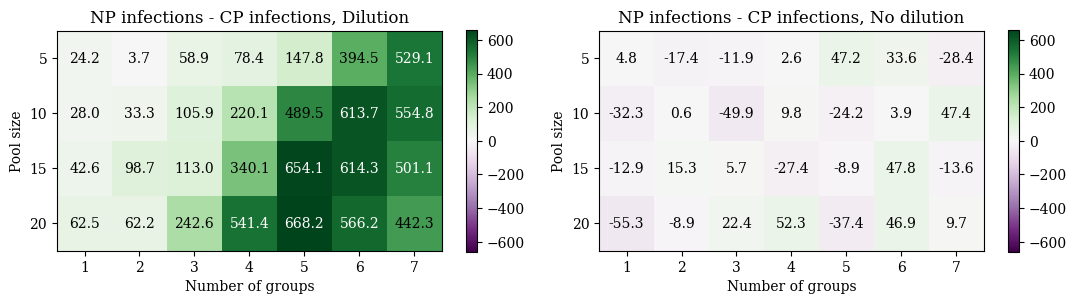

In [7]:

plt.rcParams["font.family"] = "serif"

dilute_name_mappings = {
    "average": "Dilution",
    "sum": "No dilution",
    "constant_0.5": "Se=0.5",
    "constant_0.7": "Se=0.7",
    "constant_1.0": "Se=1.0"
}

fig, axs = plt.subplots(1,2,figsize=(11,4))

t_stat_threshold = 2.6

dilute_l = ["average", "sum"]

for dilute_idx, dilute in enumerate(dilute_l):
    diff = diff_of_means_vals[dilute]

    im = axs[dilute_idx].imshow(diff.transpose(), vmin=-660, vmax=660, cmap="PRGn")
    
    colors = ["k", "w"]

    for i, num_groups in enumerate(range(1,8)):
        for j, pool_size in enumerate([5,10,15,20]):
            t_stat = diff[i,j] / sem_of_diffs_vals[dilute][i,j]
            # if t_stat > t_stat_threshold or t_stat < -t_stat_threshold:
            #     axs[dilute_idx].text(
            #         i, j, 
            #         f"{np.round(diff[i, j],1)}", 
            #         # f"{np.round(diff[i, j],2)}\n t={t_stat:.2f}", 
            #         ha='center', va='center', color=colors[np.abs(diff[i, j]) > 500], fontsize=10)
            # else:
            #     axs[dilute_idx].text(
            #         i, j, 
            #         f"{np.round(diff[i, j],1)}", 
            #         # f"{np.round(diff[i, j],2)}\n t={t_stat:.2f}", 
            #         ha='center', va='center', color='grey', fontsize=10)

            axs[dilute_idx].text(
                i, j, 
                f"{np.round(diff[i, j],1)}", 
                ha='center', va='center', color=colors[np.abs(diff[i, j]) > 500], fontsize=10)

    axs[dilute_idx].set_title("NP infections - CP infections, "+dilute_name_mappings[dilute])
    fig.colorbar(
        im, 
        shrink=0.6, 
        # orientation="horizontal"
    )
    axs[dilute_idx].set_ylabel("Pool size")
    axs[dilute_idx].set_yticks(range(4), [5,10,15,20])
    axs[dilute_idx].set_xlabel("Number of groups")
    axs[dilute_idx].set_xticks(range(7), range(1,8))
    # plt.show()

plt.tight_layout()
fig.savefig("../../figures/heatmap_dil_nodil.pdf", bbox_inches='tight')

/tmp/ipykernel_1155307/3832744472.py:36: RuntimeWarning: invalid value encountered in double_scalars
  t_stat = diff[i,j] / sem_of_diffs_vals[dilute][i,j]


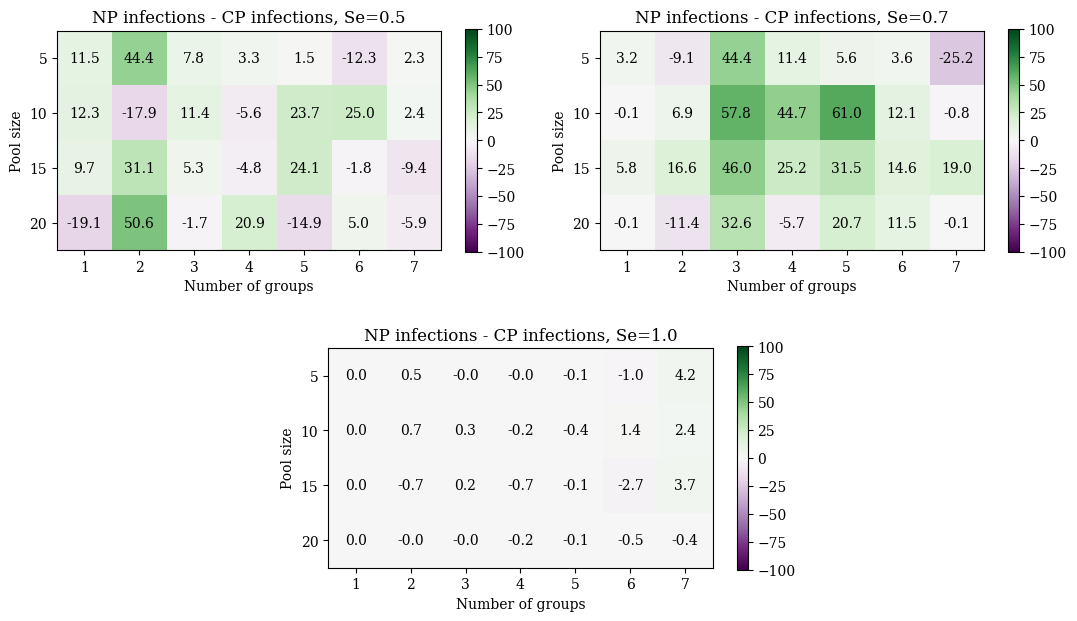

In [12]:
import matplotlib.gridspec as gridspec

plt.rcParams["font.family"] = "serif"

fig = plt.figure(figsize=(11,6.5))

gs = gridspec.GridSpec(2, 4)
ax1 = plt.subplot(gs[0, 0:2])
ax2 = plt.subplot(gs[0,2:])
ax3 = plt.subplot(gs[1,1:3])
# fig = plt.gcf()


dilute_name_mappings = {
    "average": "Dilution",
    "sum": "No dilution",
    "constant_0.5": "Se=0.5",
    "constant_0.7": "Se=0.7",
    "constant_1.0": "Se=1.0"
}

dilute_l = ["constant_0.5", "constant_0.7", "constant_1.0"]
axs = [ax1, ax2, ax3]

for dilute_idx, dilute in enumerate(dilute_l):
    diff = diff_of_means_vals[dilute]

    row, col = dilute_idx // 2, dilute_idx % 2

    im = axs[dilute_idx].imshow(diff.transpose(), vmin=-100, vmax=100, cmap="PRGn")
    
    colors = ["k", "w"]

    for i, num_groups in enumerate(range(1,8)):
        for j, pool_size in enumerate([5,10,15,20]):
            t_stat = diff[i,j] / sem_of_diffs_vals[dilute][i,j]
            # if t_stat > 1.96 or t_stat < -1.96:
            #     axs[dilute_idx].text(
            #         i, j, 
            #         f"{np.round(diff[i, j],1)}", 
            #         # f"{np.round(diff[i, j],2)}\n t={t_stat:.2f}", 
            #         ha='center', va='center', color=colors[np.abs(diff[i, j]) > 500], fontsize=8)
            # else:
            #     axs[dilute_idx].text(
            #         i, j, 
            #         f"{np.round(diff[i, j],1)}", 
            #         # f"{np.round(diff[i, j],2)}\n t={t_stat:.2f}", 
            #         ha='center', va='center', color='grey', fontsize=8)

            axs[dilute_idx].text(
                i, j, 
                f"{np.round(diff[i, j],1)}", 
                ha='center', va='center', color="k", fontsize=10)

    axs[dilute_idx].set_title("NP infections - CP infections, "+dilute_name_mappings[dilute])
    fig.colorbar(
        im, 
        shrink=0.8, 
        # orientation="horizontal"
    )
    axs[dilute_idx].set_ylabel("Pool size")
    axs[dilute_idx].set_yticks(range(4), [5,10,15,20])
    axs[dilute_idx].set_xlabel("Number of groups")
    axs[dilute_idx].set_xticks(range(7), range(1,8))
    # plt.show()

gs.tight_layout(fig)

fig.savefig("../../figures/heatmap_constant_sensitivity.pdf", bbox_inches='tight')




Mark the SEM in the cells

/tmp/ipykernel_1155307/3205566930.py:43: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ha='center', va='center', color=colors[np.abs(diff[i, j]) > 500], fontsize=8)


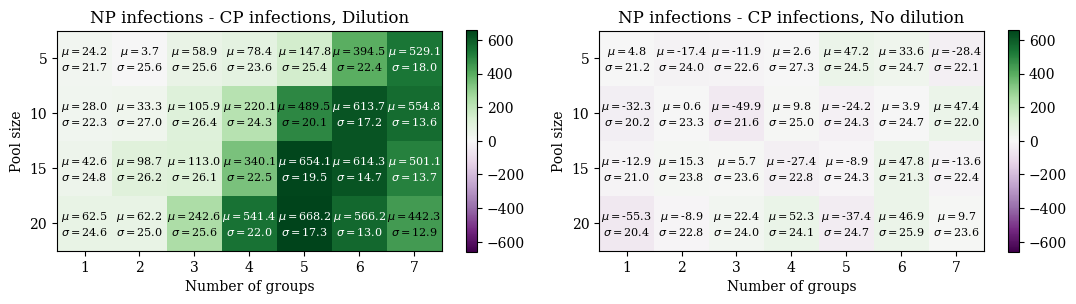

In [16]:

plt.rcParams["font.family"] = "serif"

dilute_name_mappings = {
    "average": "Dilution",
    "sum": "No dilution",
    "constant_0.5": "Se=0.5",
    "constant_0.7": "Se=0.7",
    "constant_1.0": "Se=1.0"
}

fig, axs = plt.subplots(1,2,figsize=(11,4))

t_stat_threshold = 2.6

dilute_l = ["average", "sum"]

for dilute_idx, dilute in enumerate(dilute_l):
    diff = diff_of_means_vals[dilute]

    im = axs[dilute_idx].imshow(diff.transpose(), vmin=-660, vmax=660, cmap="PRGn")
    
    colors = ["k", "w"]

    for i, num_groups in enumerate(range(1,8)):
        for j, pool_size in enumerate([5,10,15,20]):
            t_stat = diff[i,j] / sem_of_diffs_vals[dilute][i,j]

            axs[dilute_idx].text(
                i, j, 
                f"$\mu=${np.round(diff[i, j],1)}\n$\sigma=${sem_of_diffs_vals[dilute][i,j]:.1f}", 
                ha='center', va='center', color=colors[np.abs(diff[i, j]) > 500], fontsize=8)

    axs[dilute_idx].set_title("NP infections - CP infections, "+dilute_name_mappings[dilute])
    fig.colorbar(
        im, 
        shrink=0.6, 
        # orientation="horizontal"
    )
    axs[dilute_idx].set_ylabel("Pool size")
    axs[dilute_idx].set_yticks(range(4), [5,10,15,20])
    axs[dilute_idx].set_xlabel("Number of groups")
    axs[dilute_idx].set_xticks(range(7), range(1,8))
    # plt.show()

plt.tight_layout()


/tmp/ipykernel_1155307/2910465411.py:36: RuntimeWarning: invalid value encountered in double_scalars
  t_stat = diff[i,j] / sem_of_diffs_vals[dilute][i,j]


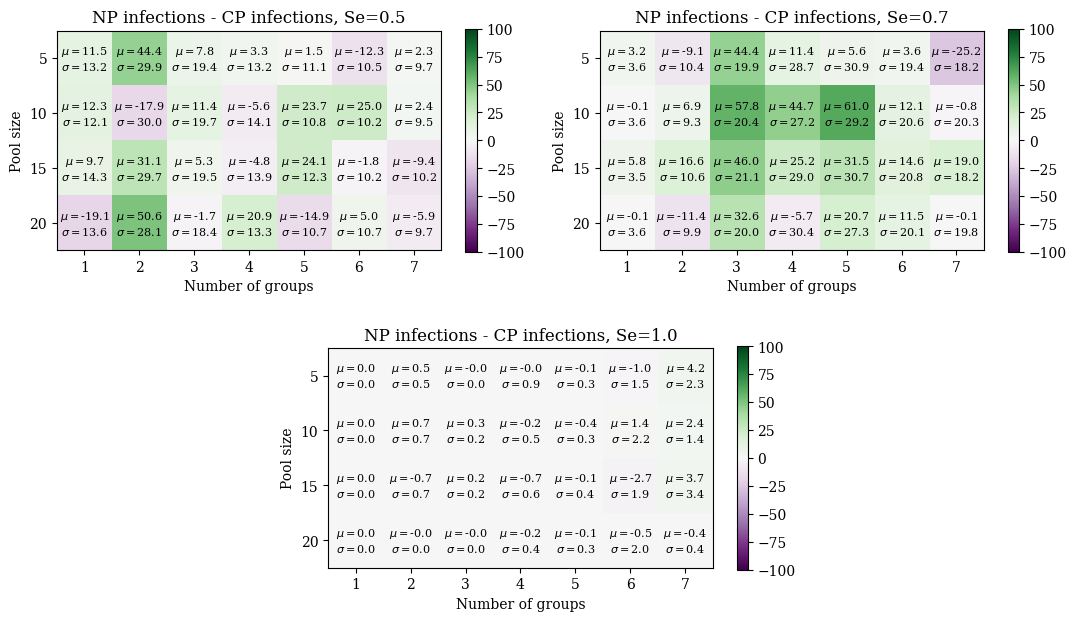

In [17]:
import matplotlib.gridspec as gridspec

plt.rcParams["font.family"] = "serif"

fig = plt.figure(figsize=(11,6.5))

gs = gridspec.GridSpec(2, 4)
ax1 = plt.subplot(gs[0, 0:2])
ax2 = plt.subplot(gs[0,2:])
ax3 = plt.subplot(gs[1,1:3])
# fig = plt.gcf()


dilute_name_mappings = {
    "average": "Dilution",
    "sum": "No dilution",
    "constant_0.5": "Se=0.5",
    "constant_0.7": "Se=0.7",
    "constant_1.0": "Se=1.0"
}

dilute_l = ["constant_0.5", "constant_0.7", "constant_1.0"]
axs = [ax1, ax2, ax3]

for dilute_idx, dilute in enumerate(dilute_l):
    diff = diff_of_means_vals[dilute]

    row, col = dilute_idx // 2, dilute_idx % 2

    im = axs[dilute_idx].imshow(diff.transpose(), vmin=-100, vmax=100, cmap="PRGn")
    
    colors = ["k", "w"]

    for i, num_groups in enumerate(range(1,8)):
        for j, pool_size in enumerate([5,10,15,20]):
            t_stat = diff[i,j] / sem_of_diffs_vals[dilute][i,j]

            axs[dilute_idx].text(
                i, j, 
                f"$\mu=${np.round(diff[i, j],1)}\n$\sigma=${sem_of_diffs_vals[dilute][i,j]:.1f}", 
                ha='center', va='center', color="k", fontsize=8)

    axs[dilute_idx].set_title("NP infections - CP infections, "+dilute_name_mappings[dilute])
    fig.colorbar(
        im, 
        shrink=0.8, 
        # orientation="horizontal"
    )
    axs[dilute_idx].set_ylabel("Pool size")
    axs[dilute_idx].set_yticks(range(4), [5,10,15,20])
    axs[dilute_idx].set_xlabel("Number of groups")
    axs[dilute_idx].set_xticks(range(7), range(1,8))
    # plt.show()

gs.tight_layout(fig)


